In [1]:
!git clone https://github.com/NearANDfar13/NLP_Winter_2024.git

Cloning into 'NLP_Winter_2024'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 109 (delta 47), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (109/109), 6.02 MiB | 7.14 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [2]:
#Import the dataset "San Fran New Sample"
import pandas as pd

df = pd.read_excel('/content/NLP_Winter_2024/NA_San_Fran_New_Sample.xlsx')

#Display DataFrame 'df'
df.head()

,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN
1,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
2,2436020-X,19/04/1906,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
3,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
4,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN


In [3]:
#From https://github.com/Deutsche-Digitale-Bibliothek/ddblabs-summer-school-2024/blob/main/002_Alto-XML-Dateien_einlesen_und_Texte_extrahieren.ipynb
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import plotly.graph_objects as go

In [5]:
df.to_csv("San_Fran_content2.csv", encoding = "UTF-8")

In [6]:
df = pd.read_csv("San_Fran_content2.csv", encoding = "UTF-8")
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber
0,0,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN
1,1,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
2,2,2436020-X,19/04/1906,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
3,3,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
4,4,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,"würden, für die die Geſellſchaften erſatzpflic...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un..."
142,142,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,war das Angebot am Sonnabend weniger umfangrei...,2.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un..."
143,143,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,"auf, auszu harren, bis alle Forderungen befrie...",4.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek
144,144,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,Ercraukungsgefahr dadurch bedeutend vermehrt. ...,6.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek


In [7]:
#Most Frequent Words Analysis - Another Method
#Text from DataFrame
content = df['Text'].tolist()
content = [text.lower() for text in content]


In [8]:
#Remove punctuation and Tokenize
listofthings = []
for entry in content:
    for c in string.punctuation:
            entry = entry.replace(c, " ")
    words = entry.split()
    listofthings.extend(words)

In [11]:
#Remove numbers
words = [word for word in listofthings if not word.isdecimal()]

In [12]:
#Import Stopwords
nltk.download('stopwords')
stopger = stopwords.words('german')

#More Stopwords from Deutsche Digitale Bibliothek
newStopwords = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
                'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'vgl', '\x97', '•', '■', 'v', 'beim', 'de','—','ge','la','be','en','que','el','ten','ver','gen','sei','nen','del','nen', 'se','schen','un','land','te','ei','aires', 'las', 'los', '«']

stopger.extend(newStopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
#Remove Stopwords
tokens_without_sw = [word for word in words if word not in stopger]
#print(tokens_without_sw)

In [16]:
# Count frequency
counts = Counter(tokens_without_sw)

# Top 20 words
top_20_words = counts.most_common(20)
top_150_words = counts.most_common(150)
print(top_20_words)

[('san', 1770), ('francisco', 1365), ('april', 744), ('erdbeben', 729), ('stadt', 485), ('feuer', 396), ('uhr', 309), ('worden', 307), ('zerstört', 303), ('wurde', 285), ('gebäude', 263), ('wurden', 256), ('flammen', 226), ('new', 212), ('millionen', 171), ('franzisko', 160), ('teil', 160), ('ganze', 156), ('newyork', 155), ('trümmern', 150)]


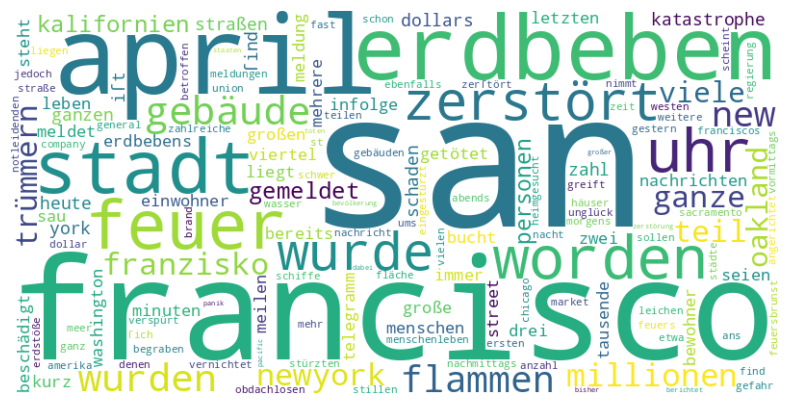

In [17]:
#WordCloud
word_freq_dict = dict(top_150_words)

wc = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

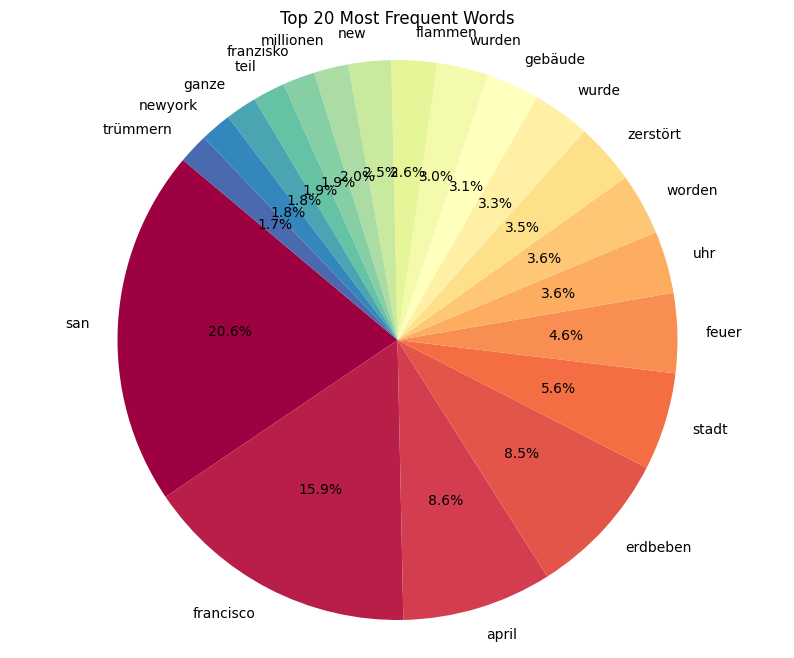

In [18]:
#Bar Graph Word Frequency
def create_circle(word_count):
  labels = [word[0] for word in word_count]
  sizes = [word[1] for word in word_count]
  colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

  plt.figure(figsize=(10, 8))
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  plt.axis('equal')
  plt.title('Top 20 Most Frequent Words')
  plt.show()

create_circle(top_20_words)

In [19]:
def tokenize(content):

  wordlist = []
  for word in content.split():
    for char in string.punctuation:
      word = word.strip(char)
    wordlist.append(word)

  words = [word for word in wordlist if not word.isdecimal()]
  tokens_without_sw = [word for word in words if word not in stopger]

  return tokens_without_sw

In [20]:
#Most frequent word per day
df['token'] = df['Text'].apply(tokenize)
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber,token
0,0,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN,"[Die, Marinestationen, Süllen, Ozean, versucht..."
1,1,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Erdbeben, Ealifornien, New-Sjork, April, Heut..."
2,2,2436020-X,19/04/1906,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[richten, lassen, Verwüstung, größer, erschein..."
3,3,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Cincinnati, April, Einem, hiesigen, Blatte, O..."
4,4,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Newyork, April, Ten, letzten, Nachrichten, an..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,"würden, für die die Geſellſchaften erſatzpflic...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Geſellſchaften, erſatzpflichtig, ſeien, New, ..."
142,142,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,war das Angebot am Sonnabend weniger umfangrei...,2.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Angebot, Sonnabend, weniger, umfangreich, let..."
143,143,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,"auf, auszu harren, bis alle Forderungen befrie...",4.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[auszu, harren, Forderungen, befriedigt, seien..."
144,144,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,Ercraukungsgefahr dadurch bedeutend vermehrt. ...,6.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Ercraukungsgefahr, dadurch, bedeutend, vermeh..."


In [21]:
def counting(tokens):
  counts = Counter(tokens)
  return counts

In [22]:
df['counts'] = df['token'].apply(counting)
df

,Unnamed: 0,ID,Day,Short_Name,Full_Name,Place,Frequency,Publication,Text,Page,Link,Datengeber,token,counts
0,0,2797055-3,19/04/1906,Badische Presse,Badische Presse : Generalanzeiger der Residenz...,Karlsruhe,täglich,1890-1944,Die Marinestationen am Süllen Ozean versuchten...,4.0,NaN,NaN,"[Die, Marinestationen, Süllen, Ozean, versucht...","{'Die': 16, 'Marinestationen': 1, 'Süllen': 1,..."
1,1,2958285-4,19/04/1906,Der Beobachter,"Der Beobachter, ein Volksblatt aus Schwaben","Stuttgart, Württemberg",täglich,1833-1920,"Erdbeben in Ealifornien. New-Sjork, 18. April....",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Erdbeben, Ealifornien, New-Sjork, April, Heut...","{'Erdbeben': 5, 'Ealifornien': 1, 'New-Sjork':..."
2,2,2436020-X,19/04/1906,Berliner Börsen-Zeitung,"Berliner Börsen-Zeitung, Tageszeitung für Poli...",Berlin,täglich,1857-1938,richten lassen die Verwüstung noch größer ersc...,5.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[richten, lassen, Verwüstung, größer, erschein...","{'richten': 1, 'lassen': 2, 'Verwüstung': 1, '..."
3,3,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Cincinnati, 18. April. Einem hiesigen Blatte w...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Cincinnati, April, Einem, hiesigen, Blatte, O...","{'Cincinnati': 1, 'April': 15, 'Einem': 1, 'hi..."
4,4,3144747-8,19/04/1906,Cannstatter Zeitung,"Cannstatter Zeitung, allgemeiner Anzeiger für ...","Stuttgart, Cannstatt, Stuttgart-Bad Cannstatt,...",täglich,1896-1914,"Newyork, 19. April. Ten letzten Nachrichten an...",3.0,https://www.deutsche-digitale-bibliothek.de/ne...,NaN,"[Newyork, April, Ten, letzten, Nachrichten, an...","{'Newyork': 1, 'April': 5, 'Ten': 1, 'letzten'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,141,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,"würden, für die die Geſellſchaften erſatzpflic...",1.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Geſellſchaften, erſatzpflichtig, ſeien, New, ...","{'Geſellſchaften': 1, 'erſatzpflichtig': 1, 'ſ..."
142,142,3000029-4,23/04/1906,Saale-Zeitung,"Saale-Zeitung, allgemeine Zeitung für Mittelde...",Halle (Saale),"täglich, unregelmäßig",1873-1933,war das Angebot am Sonnabend weniger umfangrei...,2.0,https://www.deutsche-digitale-bibliothek.de/ne...,"Martin-Luther-Universität Halle-Wittenberg, Un...","[Angebot, Sonnabend, weniger, umfangreich, let...","{'Angebot': 1, 'Sonnabend': 1, 'weniger': 1, '..."
143,143,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,"auf, auszu harren, bis alle Forderungen befrie...",4.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[auszu, harren, Forderungen, befriedigt, seien...","{'auszu': 1, 'harren': 1, 'Forderungen': 1, 'b..."
144,144,3139225-8,23/04/1906,Schwäbische Tagwacht,"Schwäbische Tagwacht, Organ der Sozialdemokrat...",Stuttgart,NaN,1890-1931,Ercraukungsgefahr dadurch bedeutend vermehrt. ...,6.0,https://www.deutsche-digitale-bibliothek.de/ne...,Württembergische Landesbibliothek,"[Ercraukungsgefahr, dadurch, bedeutend, vermeh...","{'Ercraukungsgefahr': 1, 'dadurch': 1, 'bedeut..."


In [23]:
import plotly.express as px

word_to_analyze = 'Erdbeben'

#Number of word occurences per day
word_counts = df[['Day', 'counts']].copy()
word_counts['count'] = word_counts['counts'].apply(lambda x: x.get(word_to_analyze, 0))
word_counts = word_counts.groupby('Day')['count'].sum().reset_index()

# Liniendiagramm erstellen
fig = px.line(word_counts, x='Day', y='count', title=f'Occurence of the Term "{word_to_analyze}" per Day', height=550)
fig.update_layout(xaxis_title='Day', yaxis_title='Number of Occurences')
fig.show()

In [27]:
import plotly.express as px

word_to_analyze = 'Feuer'

#Number of word occurences per day
word_counts = df[['Day', 'counts']].copy()
word_counts['count'] = word_counts['counts'].apply(lambda x: x.get(word_to_analyze, 0))
word_counts = word_counts.groupby('Day')['count'].sum().reset_index()

# Liniendiagramm erstellen
fig = px.line(word_counts, x='Day', y='count', title=f'Occurence of the Term "{word_to_analyze}" per Day', height=550)
fig.update_layout(xaxis_title='Day', yaxis_title='Number of Occurences')
fig.show()

In [28]:
#Total Entries per day
entry_counts = df.groupby('Day').size().reset_index(name='entry_count')

# Liniendiagramm erstellen
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=word_counts['Day'], y=word_counts['count'], mode='lines', name=f'Occurence of the Term "{word_to_analyze}"'))
fig2.add_trace(go.Scatter(x=entry_counts['Day'], y=entry_counts['entry_count'], mode='lines', name='Total Entries'))

fig2.update_layout(
    title=f'OccurenHäue of the Term "{word_to_analyze}" and Total Entries per Day',
    xaxis_title='Day',
    yaxis_title='Amount',
    height=550
)

fig2.show()